<a href="https://colab.research.google.com/github/Shaileshv1331/Sparks_Task--2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By-Vekariya Shailesh Dilsukhbhai**

**The Spark Foundation Internship:Data Science And Business Analytics(GRIP-JULY'21)**

**Task:2-prediction Using Unsupervised ML**

**From The Given 'Iris' dataset,predict the optimum number of clusters and represent it visually.**

**IMPORTING REQUIRED LIBRARIES**

In [54]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

**LOADING THE IRIS DATASET**

In [55]:
iris=datasets.load_iris()

**NAMING THE COLUMN OF THE DATAFRAME**

In [56]:
iris_df=p.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [58]:
print(iris_df.describe)

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>


**FINDING THE OPTIMUM VALUE OF K(CLUSTER FOR K-MEANS CLASSIFICATION)**

In [59]:
x=iris_df.iloc[:, [0,1,2,3]].values
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init='k-means++',max_iter=300,
                 n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**PLOT THE RESULTS ONTO A LINE GRAPH WHICH WILL HELP US TO OBSERVE 'THE ELBOW'**

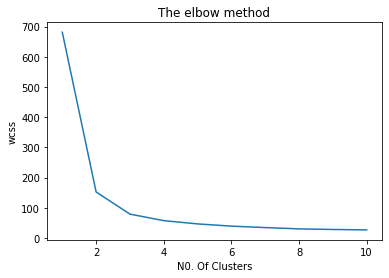

In [60]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('N0. Of Clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
## from the above graph we can choose the number of cluster as "3"

**APPLYING KMEANS TO THE DATASET AND CREATING THE KMEANS CLASSIFIER**

In [62]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

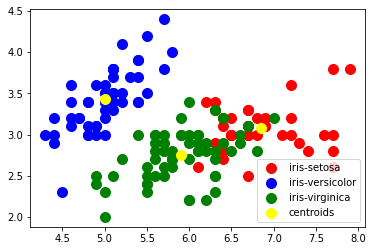

In [63]:

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s=100 ,c='red',label='iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='iris-virginica')

## PLotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend(loc='lower right')